---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [2]:
import pandas as pd

import numpy as np

In [2]:
np.random.binomial(1, 0.5)

1

In [3]:
np.random.binomial(1000, 0.5)/1000

0.489

In [ ]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

In [ ]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

In [ ]:
np.random.uniform(0, 1)

In [ ]:
np.random.normal(0.75)

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [4]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0049314567790255

In [5]:
np.std(distribution)

1.0049314567790255

In [7]:
import scipy.stats as stats
stats.kurtosis(distribution)

0.08602595701939064

In [8]:
stats.skew(distribution)

-0.021341000949563052

In [9]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9587342267862582

In [10]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2892501762383697

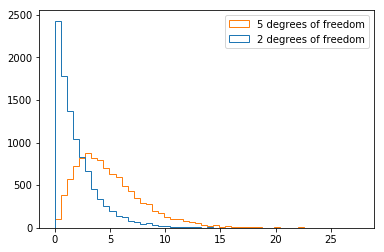

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


In [12]:
chi_squared_df7 = np.random.chisquare(7,size=10000)
stats.skew(chi_squared_df7)

1.116940099685298

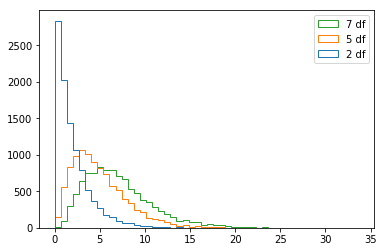

In [14]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
output = plt.hist([chi_squared_df2, chi_squared_df5, chi_squared_df7], bins=50, histtype='step',label = ['2 df', '5 df','7 df'])
plt.legend(loc='upper right')

# Hypothesis Testing

In [15]:
df = pd.read_csv('grades.csv')

In [16]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [17]:
len(df)

2315

In [18]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [19]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [20]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [21]:
from scipy import stats
stats.ttest_ind?

In [22]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [23]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [24]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

In [25]:
import pandas as pd
df = pd.read_csv('City_Zhvi_AllHomes.csv')
df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


In [44]:
df_univtowns  = pd.read_fwf('university_towns.txt',names=["university_towns"],header=None)
#df_univtowns['state_or_town'] = df_univtowns

In [45]:
df_univtowns.head()

,university_towns
0,Alabama[edit]
1,Auburn (Auburn University)[1]
2,Florence (University of North Alabama)
3,Jacksonville (Jacksonville State University)[2]
4,Livingston (University of West Alabama)[2]


In [56]:
df = pd.DataFrame([], columns=['State', 'RegionName'])

with open('university_towns.txt', 'r') as f:
    state = ""
    for line in f:
        ans = line.find('[edit]') 
        if ans > -1:
            state = line[:ans]
            continue
        region = line.strip()
        if '(' in region:
            region = region[:(region.find('(') - 1)]
        df = df.append(pd.DataFrame([[state, region]], columns=['State', 'RegionName']), ignore_index=True)
        
df.head(20)


,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
5,Alabama,Troy
6,Alabama,Tuscaloosa
7,Alabama,Tuskegee
8,Alaska,Fairbanks
9,Arizona,Flagstaff


In [12]:
df = pd.read_excel('gdplev.xls')
df = (df.drop(['Current-Dollar and "Real" Gross Domestic Product', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5'], axis=1)
        .iloc[7:]
        .rename(columns = {'Unnamed: 4':'Quarter', 'Unnamed: 6':'GDP'})
        .set_index('Quarter'))
gr_t_2000 = df.index.get_loc('2000q1')
df = df.ix[gr_t_2000:]
df = df.sort_index(ascending=False)
for i in range(1, len(df) - 1):
    if (df.iloc[i]['GDP'] > df.iloc[i - 1]['GDP']) and (df.iloc[i - 1]['GDP'] > df.iloc[i-2]['GDP']):
        print(df.iloc[i].name)

2008q4
2008q3
2008q2


In [13]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    df = pd.read_excel('gdplev.xls')
    df = (df.drop(['Current-Dollar and "Real" Gross Domestic Product', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5'], axis=1)
            .iloc[7:]
            .rename(columns = {'Unnamed: 4':'Quarter', 'Unnamed: 6':'GDP'})
            .set_index('Quarter'))    
    recession_start = get_recession_start()
    index = df.index.get_loc(recession_start)
    for i in range(index + 2, len(df)):
        if (df.iloc[i]['GDP'] > df.iloc[i - 1]['GDP']) and (df.iloc[i - 1]['GDP'] > df.iloc[i - 2]['GDP']):
            return df.iloc[i].name
    return None


In [14]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    
    df = pd.read_excel('gdplev.xls')
    df = (df.drop(['Current-Dollar and "Real" Gross Domestic Product', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5'], axis=1)
            .iloc[7:]
            .rename(columns = {'Unnamed: 4':'Quarter', 'Unnamed: 6':'GDP'})
            .set_index('Quarter'))
    gr_t_2000 = df.index.get_loc('2000q1')
    df = df.ix[gr_t_2000:]    
    for i in range(1, len(df) - 1):
        if (df.iloc[i]['GDP'] < df.iloc[i - 1]['GDP']) and (df.iloc[i + 1]['GDP'] < df.iloc[i]['GDP']):
            return df.iloc[i].name
    return None

In [15]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    df = pd.read_excel('gdplev.xls')
    df = (df.drop(['Current-Dollar and "Real" Gross Domestic Product', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5'], axis=1)
            .iloc[7:]
            .rename(columns = {'Unnamed: 4':'Quarter', 'Unnamed: 6':'GDP'})
            .set_index('Quarter'))
    start = df.index.get_loc(get_recession_start())
    end = df.index.get_loc(get_recession_end())
    table = df['GDP'][start:end + 1]
    year = df[df['GDP'] == np.min(table)].iloc[0].name
    return year



In [16]:
get_recession_bottom()

'2009q2'

In [17]:
get_recession_start()

'2008q3'

In [18]:
get_recession_end()

'2009q4'